In [2]:
# innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"

# install findspark using pip
!pip install -q findspark

In [3]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()
df2 = spark.read.csv("sample_data/Advertising.csv",inferSchema=True,header=True)

In [4]:
df2.show(5)

+---+-----+-----+---------+-----+
|_c0|   TV|Radio|Newspaper|Sales|
+---+-----+-----+---------+-----+
|  1|230.1| 37.8|     69.2| 22.1|
|  2| 44.5| 39.3|     45.1| 10.4|
|  3| 17.2| 45.9|     69.3|  9.3|
|  4|151.5| 41.3|     58.5| 18.5|
|  5|180.8| 10.8|     58.4| 12.9|
+---+-----+-----+---------+-----+
only showing top 5 rows



In [ ]:
##Imports
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler,StandardScaler,PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
df2.describe().show()

+-------+------------------+-----------------+------------------+------------------+------------------+
|summary|               _c0|               TV|             Radio|         Newspaper|             Sales|
+-------+------------------+-----------------+------------------+------------------+------------------+
|  count|               200|              200|               200|               200|               200|
|   mean|             100.5|         147.0425|23.264000000000024|30.553999999999995|14.022500000000003|
| stddev|57.879184513951124|85.85423631490805|14.846809176168728| 21.77862083852283| 5.217456565710477|
|    min|                 1|              0.7|               0.0|               0.3|               1.6|
|    max|               200|            296.4|              49.6|             114.0|              27.0|
+-------+------------------+-----------------+------------------+------------------+------------------+



In [ ]:
only_features= ['TV','Radio','Newspaper']
assembler= VectorAssembler(inputCols=only_features,outputCol='features')

In [ ]:
feat_df=assembler.transform(df2).select('features')

In [ ]:
## Standardise the dataset
scaler= StandardScaler(inputCol='features',outputCol='scaledFeature',withMean=True,withStd=True).fit(feat_df)
df_scaled=scaler.transform(feat_df)
df_scaled.show(5)

+-----------------+--------------------+
|         features|       scaledFeature|
+-----------------+--------------------+
|[230.1,37.8,69.2]|[0.96742459737630...|
| [44.5,39.3,45.1]|[-1.1943790359264...|
| [17.2,45.9,69.3]|[-1.5123598505232...|
|[151.5,41.3,58.5]|[0.05191939491081...|
|[180.8,10.8,58.4]|[0.39319550728026...|
+-----------------+--------------------+
only showing top 5 rows



In [ ]:
n_components=2
pca=PCA(k=n_components,inputCol='scaledFeature',outputCol='pcafeatures').fit(df_scaled)

df_pca=pca.transform(df_scaled)
print('explained variance Ratio',pca.explainedVariance.toArray())
df_pca.show(5)

explained variance Ratio [0.45695084 0.32775205]
+-----------------+--------------------+--------------------+
|         features|       scaledFeature|         pcafeatures|
+-----------------+--------------------+--------------------+
|[230.1,37.8,69.2]|[0.96742459737630...|[-2.1058392721893...|
| [44.5,39.3,45.1]|[-1.1943790359264...|[-0.9606335733251...|
| [17.2,45.9,69.3]|[-1.5123598505232...|[-1.9707403972183...|
|[151.5,41.3,58.5]|[0.05191939491081...|[-1.7385725893865...|
|[180.8,10.8,58.4]|[0.39319550728026...|[-0.3859922767747...|
+-----------------+--------------------+--------------------+
only showing top 5 rows



In [ ]:
X_pca=df_pca.rdd.map(lambda row:row.pcafeatures).collect()
X_pca=np.array(X_pca)
X_pca

array([[-2.10583927e+00,  5.43662934e-01],
       [-9.60633573e-01, -1.42631574e+00],
       [-1.97074040e+00, -1.96424460e+00],
       [-1.73857259e+00, -3.16210062e-01],
       [-3.85992277e-01,  3.25710224e-01],
       [-2.27095950e+00, -2.12909888e+00],
       [-3.16392365e-03, -1.06954631e+00],
       [ 8.37803613e-01, -1.43282612e-01],
       [ 2.25973711e+00, -1.16811228e+00],
       [ 1.13174114e+00,  8.71352524e-01],
       [ 1.21112899e+00, -7.04045111e-01],
       [ 6.45551937e-01,  9.39379939e-01],
       [-1.37575783e+00, -1.75765519e+00],
       [ 1.59138183e+00, -2.51789118e-01],
       [-1.07761783e+00,  4.50575283e-01],
       [-1.96498841e+00,  1.56546628e-01],
       [-3.08032084e+00, -1.59022678e+00],
       [-1.88814402e+00,  1.19878569e+00],
       [ 7.06510804e-01, -7.77803747e-01],
       [ 3.33661526e-01,  7.24262954e-02],
       [-1.10518820e+00,  6.16874488e-01],
       [ 8.51207823e-01,  1.25929261e+00],
       [ 6.18905298e-02, -1.57687012e+00],
       [ 2.

In [ ]:
df_pca=pd.DataFrame(X_pca, columns=['PC1','PC2'])
df_pca.head()

,PC1,PC2
0,-2.105839,0.543663
1,-0.960634,-1.426316
2,-1.970740,-1.964245
3,-1.738573,-0.316210
4,-0.385992,0.325710


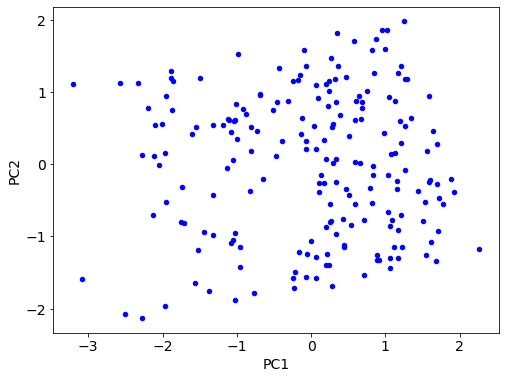

In [ ]:
plt.rcParams['figure.figsize']=8,6
plt.rcParams['font.size']=14
ax1=df_pca.plot.scatter(x='PC1',y='PC2',c='blue')

In [ ]:
output=assembler.transform(df2)
f_data=output.select('features','Sales')
f_data.show(5)

+-----------------+-----+
|         features|Sales|
+-----------------+-----+
|[230.1,37.8,69.2]| 22.1|
| [44.5,39.3,45.1]| 10.4|
| [17.2,45.9,69.3]|  9.3|
|[151.5,41.3,58.5]| 18.5|
|[180.8,10.8,58.4]| 12.9|
+-----------------+-----+
only showing top 5 rows



In [ ]:
train_data,test_data= f_data.randomSplit([0.80,0.20])

In [ ]:
regressor=LinearRegression(featuresCol='features',labelCol='Sales')
regressor=regressor.fit(train_data)

In [ ]:
coeff=regressor.coefficients
intr=regressor.intercept


print("The coefficient of the model is found to be: %a" %coeff)
print("The intercept of the model is found to be: %f" %intr)


The coefficient of the model is found to be: DenseVector([0.0453, 0.1903, -0.0026])
The intercept of the model is found to be: 3.061112


In [ ]:
pred= regressor.evaluate(test_data)
pred.predictions.show(5)

+----------------+-----+------------------+
|        features|Sales|        prediction|
+----------------+-----+------------------+
|  [4.1,11.6,5.7]|  3.2| 5.440041855240663|
|  [5.4,29.9,9.4]|  5.3| 8.972434868738972|
|[11.7,36.9,45.2]|  7.3|10.498576280992928|
|[23.8,35.1,65.9]|  9.2|10.651174664209478|
| [25.6,39.0,9.3]|  9.5|11.619665934160668|
+----------------+-----+------------------+
only showing top 5 rows



In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
eval=RegressionEvaluator(labelCol='Sales',predictionCol='prediction',metricName='rmse')

rmse=eval.evaluate(pred.predictions)
print("RMSE : %.3f" %rmse)

mse=eval.evaluate(pred.predictions,{eval.metricName:"mse"})
print("MSE : %.3f" %mse)

mae=eval.evaluate(pred.predictions,{eval.metricName:"mae"})
print("MAE : %.3f" % mae)

r2=eval.evaluate(pred.predictions,{eval.metricName:"r2"})
print("r2 : %.3f" %r2)

RMSE : 1.589
MSE : 2.526
MAE : 1.233
r2 : 0.882


9. Regression — Learning Apache Spark with Python documentation. (n.d.). Runaway. Retrieved June 21, 2022, from https://runawayhorse001.github.io/LearningApacheSpark/regression.html

Kaggle: Your Home for Data Science. (n.d.). Kaggle. Retrieved June 21, 2022, from https://www.kaggle.com/datasets/bumba5341/
